In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
# df['price']=df.target

AttributeError: 'DataFrame' object has no attribute 'target'

In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
# Analyzing missing columns

feature_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

for feature in  feature_na:
    print(f'Percent NaN values in {feature} : {(np.round(df[feature].isnull().mean(),2))*100} %')

Percent NaN values in LotFrontage : 18.0 %
Percent NaN values in Alley : 94.0 %
Percent NaN values in MasVnrType : 60.0 %
Percent NaN values in MasVnrArea : 1.0 %
Percent NaN values in BsmtQual : 3.0 %
Percent NaN values in BsmtCond : 3.0 %
Percent NaN values in BsmtExposure : 3.0 %
Percent NaN values in BsmtFinType1 : 3.0 %
Percent NaN values in BsmtFinType2 : 3.0 %
Percent NaN values in FireplaceQu : 47.0 %
Percent NaN values in GarageType : 6.0 %
Percent NaN values in GarageYrBlt : 6.0 %
Percent NaN values in GarageFinish : 6.0 %
Percent NaN values in GarageQual : 6.0 %
Percent NaN values in GarageCond : 6.0 %
Percent NaN values in PoolQC : 100.0 %
Percent NaN values in Fence : 81.0 %
Percent NaN values in MiscFeature : 96.0 %


In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


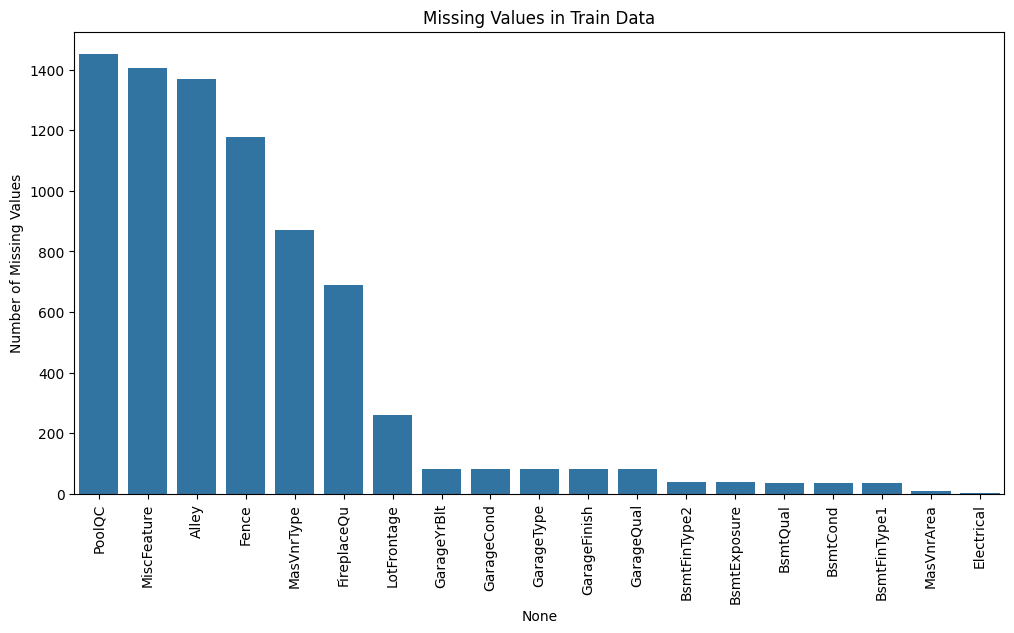

(SalePrice       1.000000
 OverallQual     0.790982
 GrLivArea       0.708624
 GarageCars      0.640409
 GarageArea      0.623431
 TotalBsmtSF     0.613581
 1stFlrSF        0.605852
 FullBath        0.560664
 TotRmsAbvGrd    0.533723
 YearBuilt       0.522897
 YearRemodAdd    0.507101
 GarageYrBlt     0.486362
 MasVnrArea      0.477493
 Fireplaces      0.466929
 BsmtFinSF1      0.386420
 Name: SalePrice, dtype: float64,
 YrSold          -0.028923
 OverallCond     -0.077856
 MSSubClass      -0.084284
 EnclosedPorch   -0.128578
 KitchenAbvGr    -0.135907
 Name: SalePrice, dtype: float64)

In [ ]:
# Checking for missing values in the training data
missing_values_train = df.isnull().sum().sort_values(ascending=False)
missing_values_train = missing_values_train[missing_values_train > 0]

# Plot missing values in train dataset
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values_train.index, y=missing_values_train)
plt.xticks(rotation=90)
plt.title('Missing Values in Train Data')
plt.ylabel('Number of Missing Values')
plt.show()

# Check the correlation of features with the target variable SalePrice
corr_matrix = df.corr(numeric_only=True) # Added numeric_only=True to only include numerical features

# Sort correlations of features with SalePrice
corr_with_target = corr_matrix["SalePrice"].sort_values(ascending=False)

# Display top correlated features with SalePrice
corr_with_target.head(15), corr_with_target.tail(5)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Separate target and features
X = df.drop(["SalePrice", "Id"], axis=1)
y = df["SalePrice"]

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Checking shapes of the splits
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((1168, 79), (292, 79), (1168,), (292,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary to hold models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest Regressor": RandomForestRegressor(random_state=0)
}

# Dictionary to store the results
results = {}
results_1 = {}

# Loop through models, train and evaluate them
for model_name, model in models.items():
    # Create a pipeline with preprocessing and model
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Train the model
    clf.fit(X_train, y_train)

    # Predict on validation set
    y_pred = clf.predict(X_val)

    # Calculate and store the RMSE for the model
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2_square=r2_score(y_val,y_pred)
    results_1[model_name]=r2_square
    results[model_name] = rmse

print(results)
print(results_1)

{'Linear Regression': 59403.23694110275, 'Decision Tree': 44312.830071263306, 'Random Forest Regressor': 33246.46959246955}
{'Linear Regression': 0.48902096375186, 'Decision Tree': 0.7156574615492698, 'Random Forest Regressor': 0.839943273293733}


In [ ]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')

# Predict on the test set using the best model
test_predictions = best_model.predict(test_data.drop('Id', axis=1))

# Create submission file
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)

print("Best model saved as 'best_model.pkl' and submission file created as 'submission.csv'.")
